# Supermarket Project

##Objectives:

- Analyze the most used payment methods
- Understand sales volume by city
- Sales segmented by gender
- Analyze profit percentage by product category
- Understand sales trends by period, including the best days of the week and the busiest days of the month

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/supermarket_sales - Sheet1.csv')

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Creating total net

sales['Total Net'] = sales['Total'] - sales['Tax 5%']
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total Net
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


In [ ]:
# Criando colunas de data e hora separadamente

sales['Date'] = pd.to_datetime(sales['Date'])
sales['Year'] = (sales['Date']).dt.year
sales['Month'] = (sales['Date']).dt.month
sales['Day'] = (sales['Date']).dt.day
sales['Name of Day'] = (sales['Date']).dt.day_name()
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Time'] = pd.to_datetime(sales['Time'])
sales['hour'] = (sales['Time']).dt.hour

<ipython-input-6-d2c64c2f7567>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [ ]:
# Listando colunas

sales.columns.tolist()

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating',
 'Total Net',
 'Year',
 'Month',
 'Day',
 'Name of Day',
 'hour']

In [ ]:
# Droping useless columns

sales.drop(['Invoice ID', 'Branch'], axis=1, inplace = True)

KeyError: "['Invoice ID', 'Branch'] not found in axis"

In [ ]:
# Renaming the column cogs

sales.rename(columns={'cogs': 'Cost of Goods Sold'}, inplace=True)

## Descriptive analysis

In [ ]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,Cost of Goods Sold,gross margin percentage,gross income,Rating,Total Net,Year,Month,Day,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2024-09-18 15:24:41.880000,307.58738,4.761905,15.379369,6.97270,307.58738,2019.0,1.993000,15.256000,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2024-09-18 10:00:00,10.17000,4.761905,0.508500,4.00000,10.17000,2019.0,1.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2024-09-18 12:43:00,118.49750,4.761905,5.924875,5.50000,118.49750,2019.0,1.000000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2024-09-18 15:19:00,241.76000,4.761905,12.088000,7.00000,241.76000,2019.0,2.000000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2024-09-18 18:15:00,448.90500,4.761905,22.445250,8.50000,448.90500,2019.0,3.000000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2024-09-18 20:59:00,993.00000,4.761905,49.650000,10.00000,993.00000,2019.0,3.000000,31.000000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,0.000000,11.708825,1.71858,234.17651,0.0,0.835254,8.693563,3.186857


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City                     1000 non-null   object        
 1   Customer type            1000 non-null   object        
 2   Gender                   1000 non-null   object        
 3   Product line             1000 non-null   object        
 4   Unit price               1000 non-null   float64       
 5   Quantity                 1000 non-null   int64         
 6   Tax 5%                   1000 non-null   float64       
 7   Total                    1000 non-null   float64       
 8   Date                     1000 non-null   datetime64[ns]
 9   Time                     1000 non-null   datetime64[ns]
 10  Payment                  1000 non-null   object        
 11  Cost of Goods Sold       1000 non-null   float64       
 12  gross margin percentage  1000 non-n

## Exploratory analysis

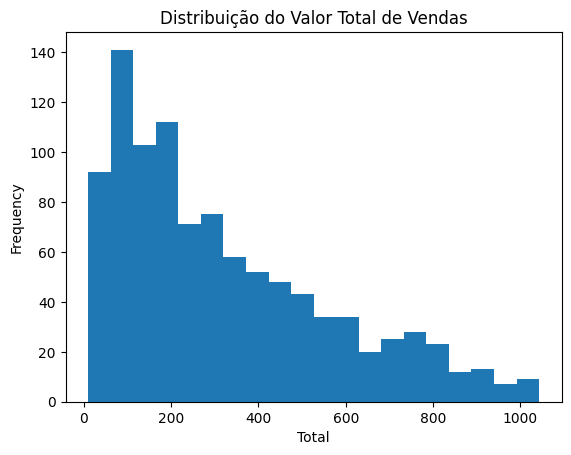

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sales['Total'], bins=20)
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Distribuição do Valor Total de Vendas')
plt.show()

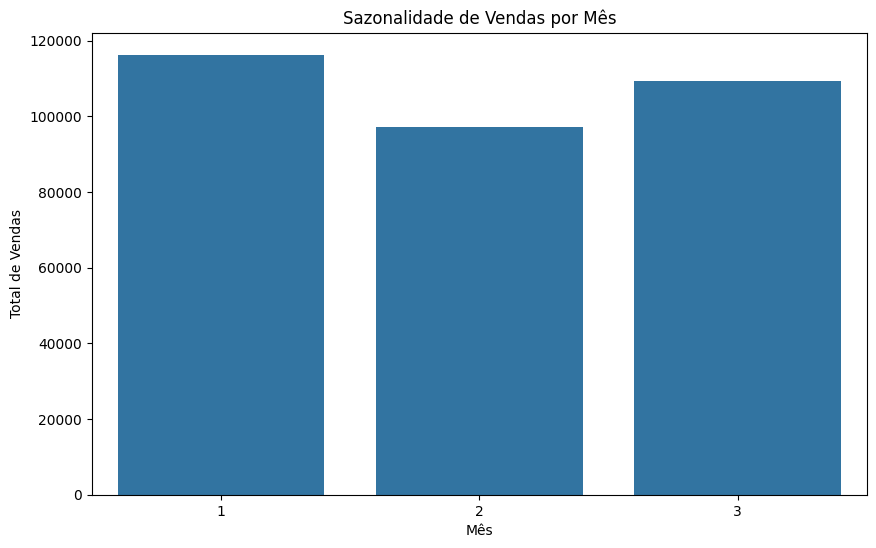

In [ ]:
import seaborn as sns

# Grouping by monthly sales and total revenue
monthly_sales = sales.groupby('Month')['Total'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Sazonalidade de Vendas por Mês')
plt.show()

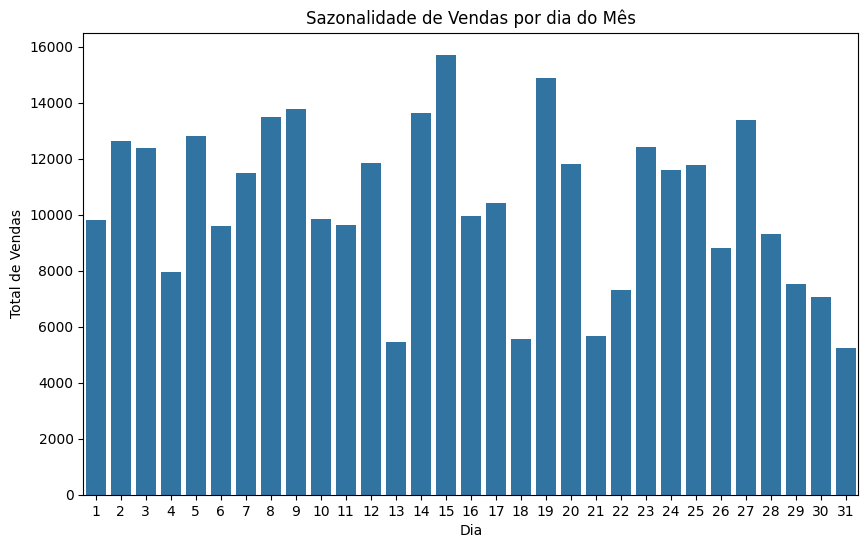

In [ ]:
# Grouping by daily sales and total revenue
monthly_sales = sales.groupby('Day')['Total'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.title('Sazonalidade de Vendas por dia do Mês')
plt.show()

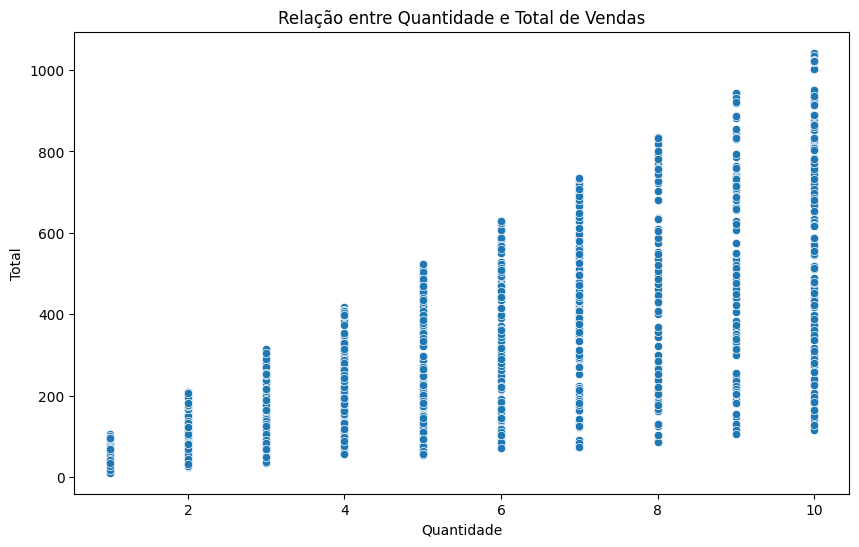

In [ ]:
# Relationship between total sales based on the quantity of products
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=sales)
plt.xlabel('Quantidade')
plt.ylabel('Total')
plt.title('Relação entre Quantidade e Total de Vendas')
plt.show()

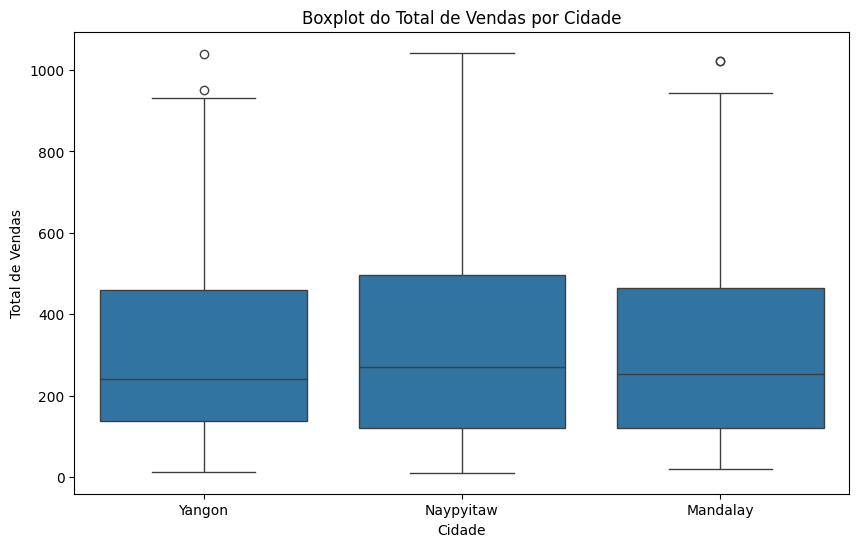

In [ ]:
# Plotting sales by city
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Total', data=sales)
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')
plt.title('Boxplot do Total de Vendas por Cidade')
plt.show()

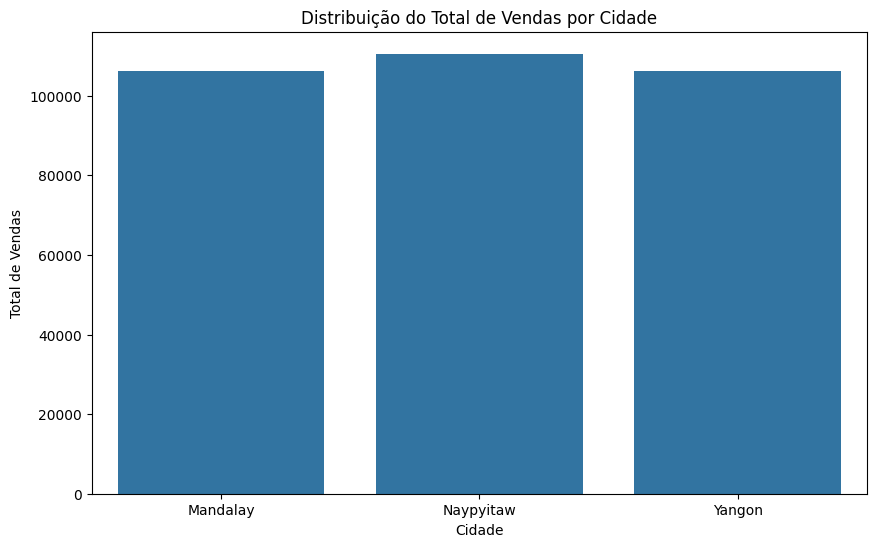

In [ ]:
# Grouping by Agrupar as vendas por cidade e calcular a soma do total de vendas
city_sales = sales.groupby('City')['Total'].sum()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')
plt.title('Distribuição do Total de Vendas por Cidade')
plt.show()


<Figure size 1000x600 with 0 Axes>

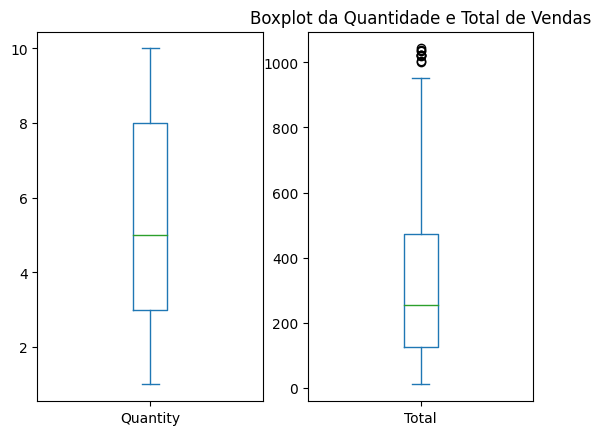

In [ ]:
# Plotagem da quantidade de vendas comparada ao total
plt.figure(figsize=(10, 6))
sales[['Quantity', 'Total']].plot(kind='box', subplots=True, layout=(1, 2))
plt.title('Boxplot da Quantidade e Total de Vendas')
plt.show()

# Frequências

In [ ]:
sales['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [ ]:
sales['Customer type'].value_counts()

,count
Customer type,
Member,501
Normal,499


In [ ]:
sales['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [ ]:
sales['Quantity'].value_counts().sort_index()

,count
Quantity,
1,112
2,91
3,90
4,109
5,102
6,98
7,102
8,85
9,92


In [ ]:
sales['Month'].value_counts()

,count
Month,
1,352
3,345
2,303


In [ ]:
# Best sales day (quantity of sales): Saturday
sales['Name of Day'].value_counts(ascending=True)

,count
Name of Day,
Monday,125
Sunday,133
Thursday,138
Friday,139
Wednesday,143
Tuesday,158
Saturday,164


In [ ]:
# Most used payment method: e-wallet
sales['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [ ]:
# Count of ratings
round(sales['Rating']).value_counts().sort_index()

,count
Rating,
4.0,102
5.0,133
6.0,193
7.0,159
8.0,179
9.0,141
10.0,93


## Correlation

In [ ]:
# Correlation between numeric variables
sales.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,Cost of Goods Sold,gross margin percentage,gross income,Rating,Total Net,Year,Month,Day,hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.633962,NaN,-0.027387,0.057021,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.705510,NaN,-0.014524,-0.043347,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,NaN,-0.022301,-0.002515,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,NaN,-0.022301,-0.002515,-0.002770
Cost of Goods Sold,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,NaN,-0.022301,-0.002515,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,NaN,-0.022301,-0.002515,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.036442,NaN,-0.042880,-0.007076,-0.030588
Total Net,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,NaN,-0.022301,-0.002515,-0.002770
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

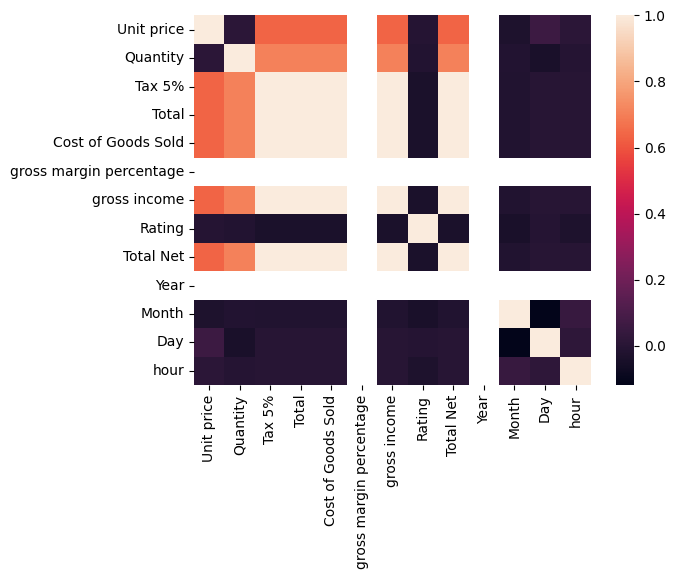

In [ ]:
# Heatmap with variables
sns.heatmap(sales.corr(numeric_only=True))

## Grouping by and crosstabing

In [ ]:
# Customer type by city
pd.crosstab(sales['Customer type'], sales['City'])

City,Mandalay,Naypyitaw,Yangon
Customer type,,,
Member,165,169,167
Normal,167,159,173


In [ ]:
# Customer type by gender
pd.crosstab(sales['Customer type'], sales['Gender'])

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


In [ ]:
# Gender by city
pd.crosstab(sales['Gender'], sales['City'])

City,Mandalay,Naypyitaw,Yangon
Gender,,,
Female,162,178,161
Male,170,150,179


In [ ]:
# Payment methods by city
pd.crosstab(sales['Payment'], sales['City'])

City,Mandalay,Naypyitaw,Yangon
Payment,,,
Cash,110,124,110
Credit card,109,98,104
Ewallet,113,106,126


In [ ]:
# Payment method by gender
pd.crosstab(sales['Gender'], sales['Payment'])

Payment,Cash,Credit card,Ewallet
Gender,,,
Female,178,163,160
Male,166,148,185


## Grouping by considering the total revenue

In [ ]:
# Net revenue by product line considering gender
pd.crosstab(sales['Gender'] , sales['Product line'] , values= sales['Total Net'], aggfunc= "sum").round(2)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,,,
Female,25811.45,28988.0,31591.35,17677.13,28606.55,27214.02
Male,25938.58,22731.9,21879.93,29174.05,22690.51,25283.91


In [ ]:
# Net revenue by customer type in each city
pd.crosstab(sales['City'], sales['Customer type'], values=sales['Total Net'], aggfunc= 'sum').round(2)

Customer type,Member,Normal
City,,
Mandalay,51147.32,49993.32
Naypyitaw,54172.65,51130.88
Yangon,51083.31,50059.90


In [ ]:
# Net revenue by product line in each city
pd.crosstab(sales['City'], sales['Product line'], values= sales['Total'], aggfunc='sum').round(2)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,17051.44,16413.32,15214.89,19980.66,17549.16,19988.20
Naypyitaw,18968.97,21560.07,23766.86,16615.33,13895.55,15761.93
Yangon,18317.11,16332.51,17163.10,12597.75,22417.20,19372.70


In [ ]:
# Net revenue by week day in each city
pd.crosstab(sales['City'], sales['Name of Day'], values = sales['Total'], aggfunc='sum').round(2)

Name of Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
City,,,,,,,
Mandalay,14417.76,12734.70,21284.42,10415.33,15778.62,18859.24,12707.59
Naypyitaw,14964.72,10925.31,18070.97,17035.75,14148.35,17667.79,17755.81
Yangon,14543.86,14239.06,16765.41,17006.82,15422.27,14955.21,13267.73


In [ ]:
# Net revenue by week day considering gender
pd.crosstab(sales['Gender'], sales['Name of Day'], values = sales['Total'], aggfunc='sum').round(2)

Name of Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Gender,,,,,,,
Female,24147.81,20412.01,29330.23,23100.77,20523.51,30431.97,19936.63
Male,19778.54,17487.07,26790.58,21357.13,24825.74,21050.27,23794.50


## Grouping by considering Taxes

In [ ]:
# Total of taxes payed by product line in each country
pd.crosstab(sales['City'], sales['Product line'], values= sales['Tax 5%'], aggfunc= "sum").round(2)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,811.97,781.59,724.52,951.46,835.67,951.82
Naypyitaw,903.28,1026.67,1131.75,791.21,661.69,750.57
Yangon,872.24,777.74,817.29,599.89,1067.49,922.51


In [ ]:
pd.crosstab(sales['Month'], sales['Product line'], values= sales['Tax 5%'], aggfunc= "sum").round(2)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
1,896.73,921.20,931.93,780.15,975.94,1031.76
2,826.80,905.23,952.40,695.35,592.11,657.60
3,863.97,759.57,789.24,867.06,996.80,935.53


In [ ]:
# Total tax payed by month
pd.crosstab(sales['Month'], columns='Tax 5%', values=sales['Tax 5%'], aggfunc='sum').reset_index().round(2)


col_0,Month,Tax 5%
0,1,5537.71
1,2,4629.49
2,3,5212.17


In [ ]:
# Total revenue and tax by gender in each city
sales.groupby(['City','Gender']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

}).round(2)

Tax 5%     Total
City      Gender                   
Mandalay  Female  2520.40  52928.30
          Male    2536.64  53269.38
Naypyitaw Female  2937.40  61685.46
          Male    2327.77  48883.24
Yangon    Female  2536.63  53269.17
          Male    2520.53  52931.20

In [ ]:
# Total revenue and tax by month in each city
sales.groupby(['City','Month']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

}).round(2)

Tax 5%     Total
City      Month                   
Mandalay  1      1770.29  37176.06
          2      1639.25  34424.27
          3      1647.49  34597.34
Naypyitaw 1      1925.46  40434.68
          2      1568.33  32934.98
          3      1771.38  37199.04
Yangon    1      1841.96  38681.13
          2      1421.91  29860.12
          3      1793.29  37659.12

In [ ]:
sales.groupby(['City','Name of Day']).agg({
    'Tax 5%' : 'sum',
    'Total' : 'sum'

}).round(2)

Tax 5%     Total
City      Name of Day                   
Mandalay  Friday        686.56  14417.76
          Monday        606.41  12734.70
          Saturday     1013.54  21284.42
          Sunday        495.97  10415.33
          Thursday      751.36  15778.62
          Tuesday       898.06  18859.24
          Wednesday     605.12  12707.59
Naypyitaw Friday        712.61  14964.72
          Monday        520.25  10925.31
          Saturday      860.52  18070.97
          Sunday        811.23  17035.75
          Thursday      673.73  14148.35
          Tuesday       841.32  17667.79
          Wednesday     845.52  17755.81
Yangon    Friday        692.56  14543.86
          Monday        678.05  14239.06
          Saturday      798.35  16765.41
          Sunday        809.85  17006.82
          Thursday      734.39  15422.27
          Tuesday       712.15  14955.21
          Wednesday     631.80  13267.73

# Visualization

<ipython-input-55-a3b9df7a33fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=sales, palette='viridis')


Text(0.5, 1.0, 'Which Payment Method is most used?')

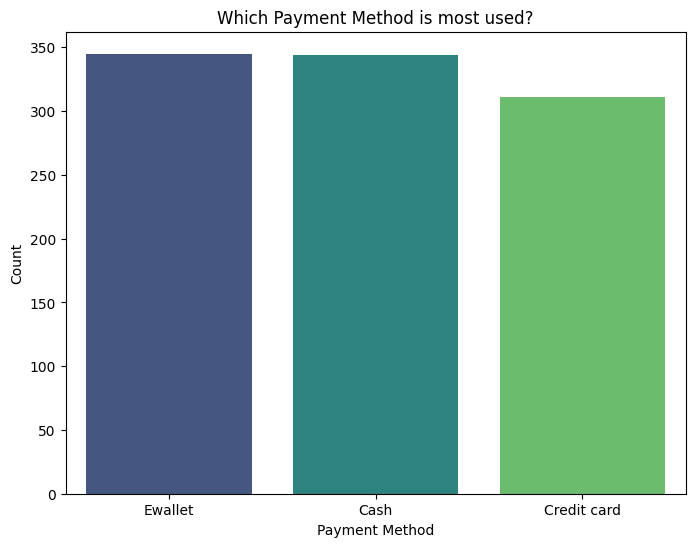

In [ ]:
# Most used payment method
plt.figure(figsize=(8,6))
sns.countplot(x='Payment', data=sales, palette='viridis')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')

<Figure size 800x600 with 0 Axes>

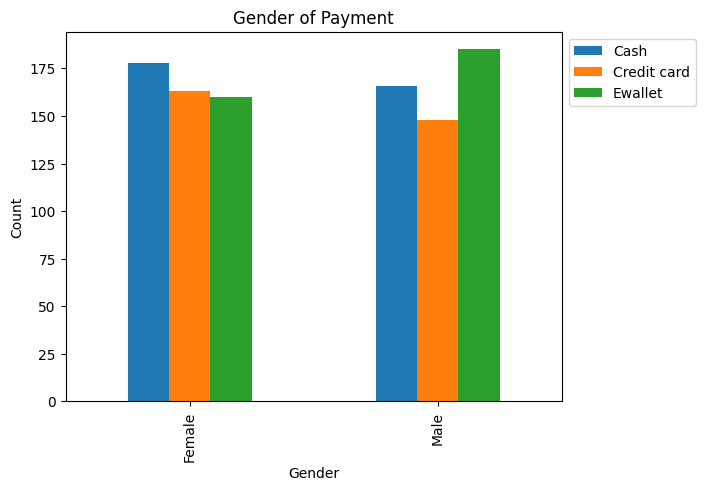

In [ ]:
# Payment methods by gender
Gender_Payment = pd.crosstab(sales['Gender'], sales['Payment'])
plt.figure(figsize=(8, 6))
Gender_Payment.plot(kind='bar')
plt.title('Gender of Payment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<ipython-input-67-3a63973d5220>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='pastel')


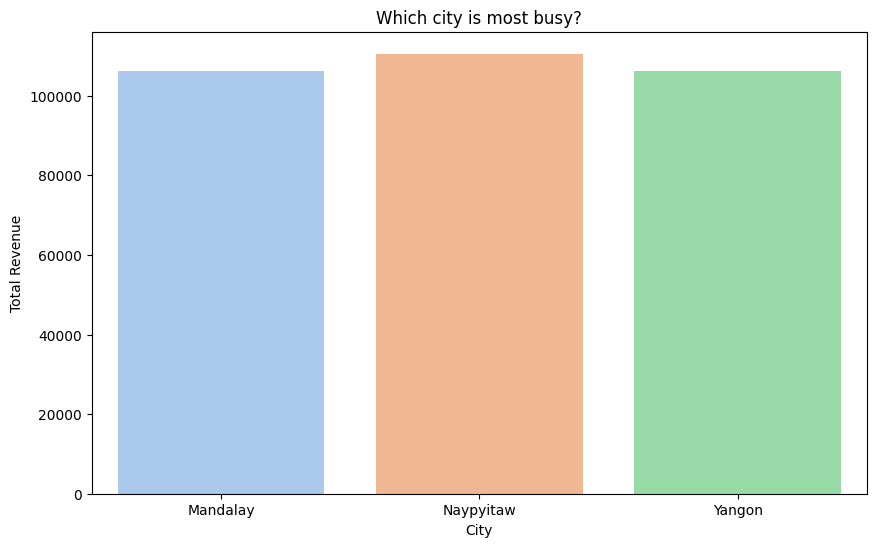

In [ ]:
# Grouping sales by city and revenue
city_sales = sales.groupby('City')['Total'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values, palette='pastel')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Which city is most busy?')
plt.show()

<Figure size 1000x800 with 0 Axes>

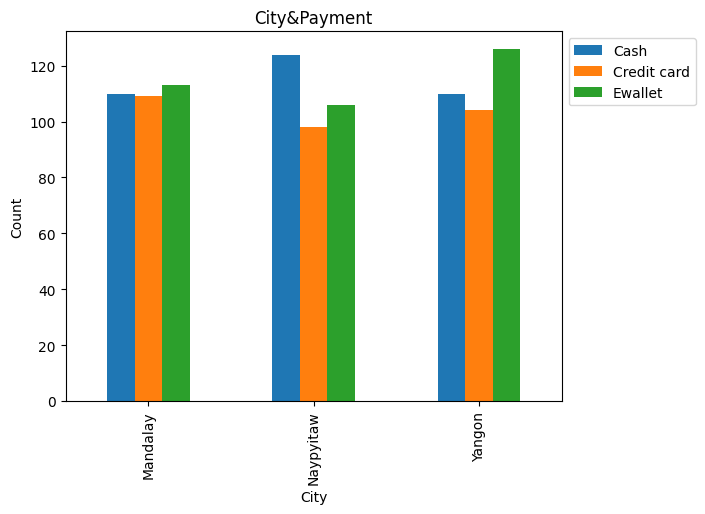

In [ ]:
# Understanding the payment methods by gender and city
city_payment =  pd.crosstab(sales['City'], sales['Payment'])
plt.figure(figsize=(10, 8))
city_payment.plot(kind='bar')
plt.title('City&Payment')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

<ipython-input-68-cb4c3bc34a88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_sales.index, y=day_sales.values, palette='bright')


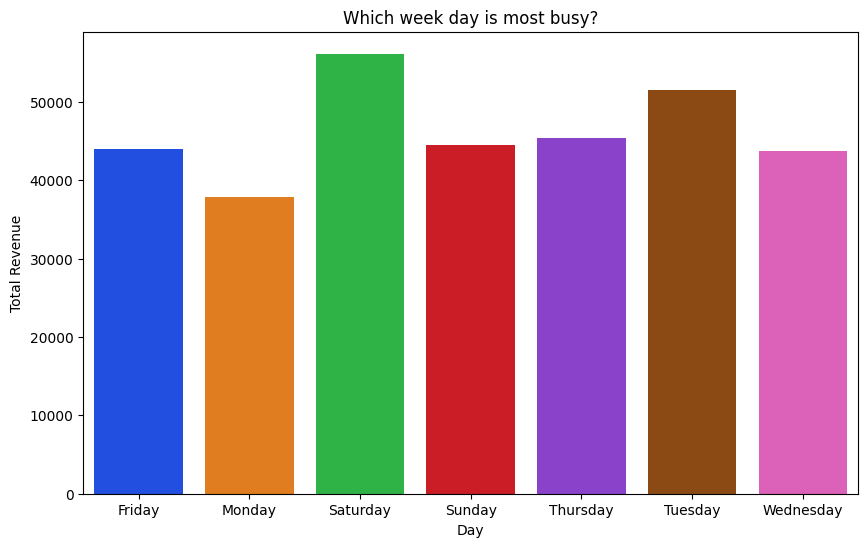

In [ ]:
# Total revenue by week day
day_sales = sales.groupby('Name of Day')['Total'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_sales.index, y=day_sales.values, palette='bright')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.title('Which week day is most busy?')
plt.show()

<ipython-input-69-e115acbd2391>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= sales['Day'], data=sales, palette='muted')


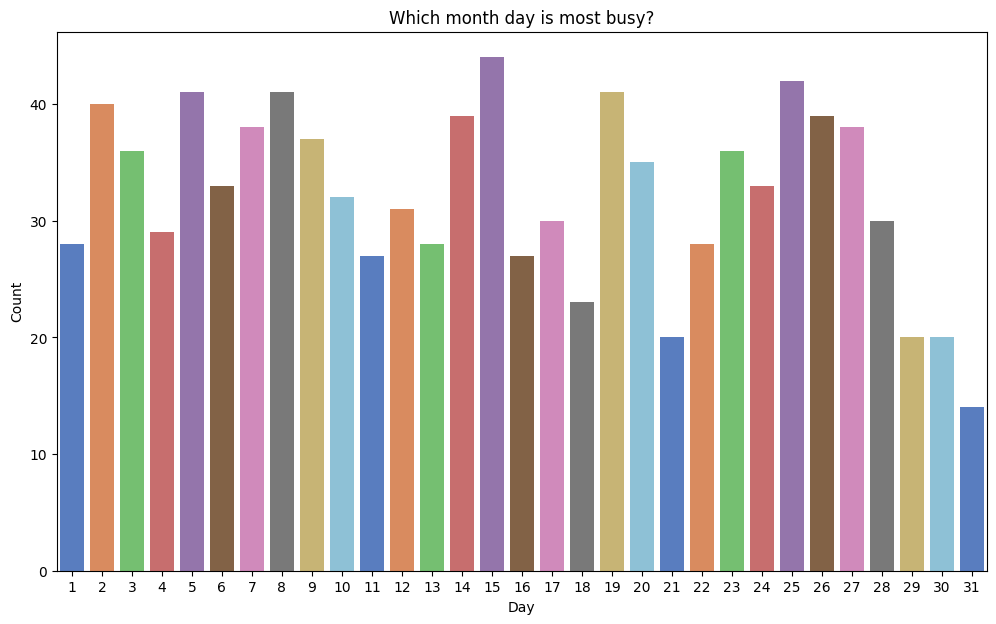

In [ ]:
# Total revenue by month day
plt.figure(figsize=(12, 7))
sns.countplot(x= sales['Day'], data=sales, palette='muted')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Which month day is most busy?')
plt.show()